## Imports

In [1]:
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import seaborn

In [2]:
import json
import fsspec
import kerchunk.hdf

## List of files

In [3]:
# Conservative temperature
Tf = !ls /gws/nopw/j04/noc_msm/atb299/NOC_NPD/Analysis/output_v1/*Tconmean.nc
Tf2 = !ls /gws/nopw/j04/noc_msm/atb299/NOC_NPD/Analysis/output/*Tconmean.nc
TfA = !ls /gws/nopw/j04/noc_msm/atb299/NOC_NPD/Analysis_GO8p7h/output/*Tconmean.nc

# Absolute salinity
Sf = !ls /gws/nopw/j04/noc_msm/atb299/NOC_NPD/Analysis/output_v1/*Sabsmean.nc
Sf2 = !ls /gws/nopw/j04/noc_msm/atb299/NOC_NPD/Analysis/output/*Sabsmean.nc
SfA = !ls /gws/nopw/j04/noc_msm/atb299/NOC_NPD/Analysis_GO8p7h/output/*Sabsmean.nc
#Tf[:]

In [4]:
#Tf2

## Load TDS data

In [4]:
def corr_cal(ds):
    ds.time_centered.attrs['calendar'] = f'gregorian'
    ds['time_counter'] = ds.time_centered
    ds = xr.decode_cf(ds)
    return ds

In [5]:
# Alex's GO8p7
TS_A = xr.open_mfdataset(TfA[12:],preprocess=corr_cal, use_cftime=True)#, decode_times=False)
SS_A = xr.open_mfdataset(SfA[12:],preprocess=corr_cal, use_cftime=True)#, decode_times=False)

# NPD (issue with non-leap and leap year calendars to resolve... )
TS  = xr.open_mfdataset(Tf[12:],preprocess=corr_cal, use_cftime=True)#, decode_times=False)
SS  = xr.open_mfdataset(Sf[12:],preprocess=corr_cal, use_cftime=True)#, decode_times=False)
TSp = xr.open_mfdataset(Tf[:12],preprocess=corr_cal, use_cftime=True)#, decode_times=False)
SSp = xr.open_mfdataset(Sf[:12],preprocess=corr_cal, use_cftime=True)#, decode_times=False)

# NPDv2 (adjusted rn_efr and ice meltpond choices)
TS2 = xr.open_mfdataset(Tf2[:],preprocess=corr_cal, use_cftime=True)#, decode_times=False)
SS2 = xr.open_mfdataset(Sf2[:],preprocess=corr_cal, use_cftime=True)#, decode_times=False)

In [6]:
TS_A

<xarray.Dataset>
Dimensions:             (time_counter: 756, y: 1, x: 1, deptht: 75)
Coordinates:
  * deptht              (deptht) float64 0.5058 1.556 ... 5.698e+03 5.902e+03
  * time_counter        (time_counter) object 1959-01-16 12:00:00 ... 2021-12...
Dimensions without coordinates: y, x
Data variables:
    nav_lon             (time_counter, y, x) float64 dask.array<chunksize=(1, 1, 1), meta=np.ndarray>
    nav_lat             (time_counter, y, x) float64 dask.array<chunksize=(1, 1, 1), meta=np.ndarray>
    time_centered       (time_counter) object dask.array<chunksize=(1,), meta=np.ndarray>
    mean_thetao_con     (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 75, 1, 1), meta=np.ndarray>
    mean_3D_thetao_con  (time_counter, y, x) float32 dask.array<chunksize=(1, 1, 1), meta=np.ndarray>
    var_thetao_con      (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 75, 1, 1), meta=np.ndarray>
    var_3D_thetao_con   (time_counter, y, x) float32 dask.array<chunksize=(1, 1, 1), meta=np.ndarray>
    sum_thetao_con      (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 75, 1, 1), meta=np.ndarray>
    sum_3D_thetao_con   (time_counter, y, x) float32 dask.array<chunksize=(1, 1, 1), meta=np.ndarray>
    min_thetao_con      (time_counter, y, x) float32 dask.array<chunksize=(1, 1, 1), meta=np.ndarray>
    max_thetao_con      (time_counter, y, x) float32 dask.array<chunksize=(1, 1, 1), meta=np.ndarray>
Attributes:
    start_date:        -1
    output_frequency:  N/A
    CONFIG:            N/A
    CASE:              N/A
    history:           Partial step computation ; /home/users/atb299/CDFTOOLS...

## Plots of global quantities

In [7]:
GO8ys = (2005 - 1959)*12  # Start plots at 2005

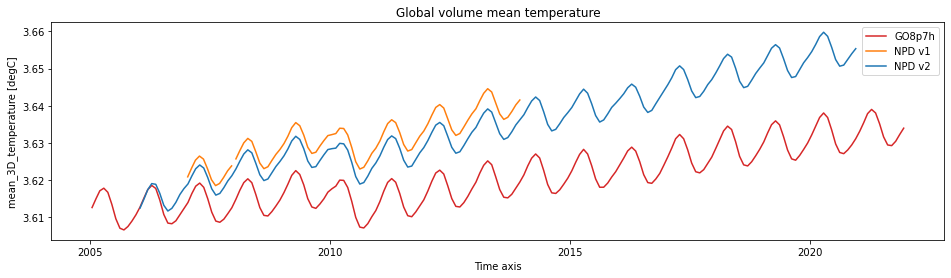

In [8]:
TS_A['mean_3D_thetao_con'][GO8ys:,:].plot(aspect=4, size=4, color='C3',label="GO8p7h");
TSp['mean_3D_thetao_con'].plot(color='C1',label="NPD v1"); TS['mean_3D_thetao_con'].plot(color='C1');
TS2['mean_3D_thetao_con'].plot(color='C0',label="NPD v2"); 
plt.title("Global volume mean temperature");
plt.legend();

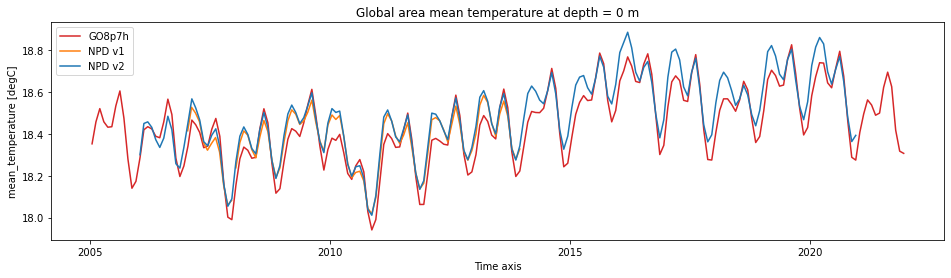

In [9]:
mlev = 0; 
TS_A['mean_thetao_con'][GO8ys:,mlev].plot(aspect=4, size=4, color='C3',label="GO8p7h");
TSp['mean_thetao_con'][:,mlev].plot(color='C1',label="NPD v1"); TS['mean_thetao_con'][:,mlev].plot(color='C1');
TS2['mean_thetao_con'][:,mlev].plot(color='C0',label="NPD v2");
plt.title("Global area mean temperature at depth = "+str(int(TS2['deptht'][mlev].values))+" m" );
plt.legend();

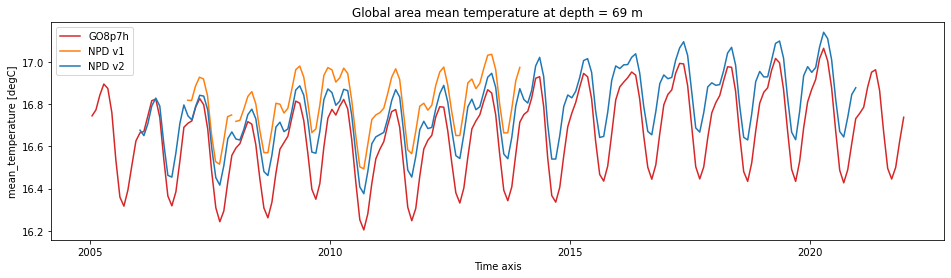

In [10]:
mlev = 20
TS_A['mean_thetao_con'][GO8ys:,mlev].plot(aspect=4, size=4, color='C3',label="GO8p7h");
TSp['mean_thetao_con'][:,mlev].plot(color='C1',label="NPD v1"); TS['mean_thetao_con'][:,mlev].plot(color='C1');
TS2['mean_thetao_con'][:,mlev].plot(color='C0',label="NPD v2");
plt.title("Global area mean temperature at depth = "+str(int(TS2['deptht'][mlev].values))+" m" );
plt.legend();

### NDS (v4.2) shows little/no unphysically cold water formation...

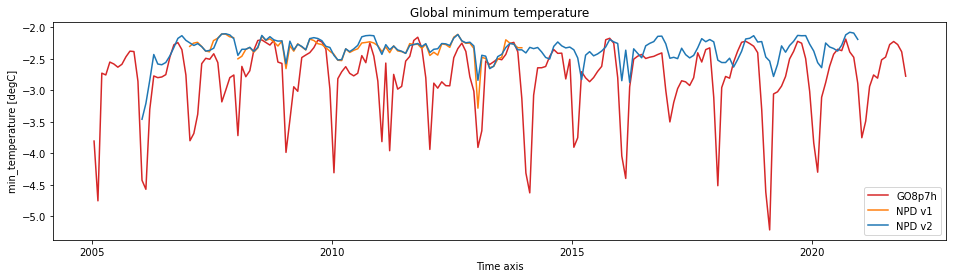

In [11]:
TS_A['min_thetao_con'][GO8ys:].plot(aspect=4, size=4, color='C3',label="GO8p7h");
TSp['min_thetao_con'][:].plot(color='C1',label="NPD v1"); TS['min_thetao_con'][:].plot(color='C1');
TS2['min_thetao_con'][:].plot(color='C0',label="NPD v2");
plt.title("Global minimum temperature");
plt.legend();

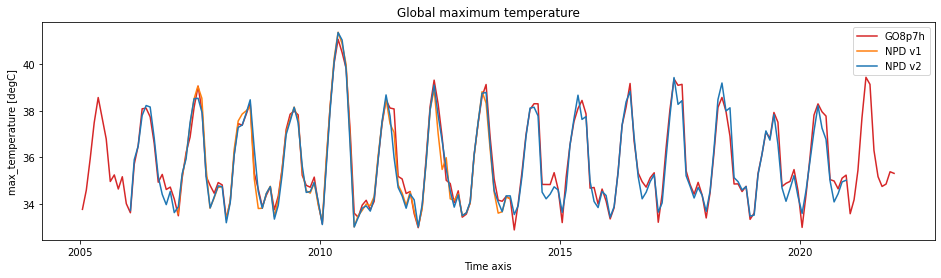

In [12]:
TS_A['max_thetao_con'][GO8ys:].plot(aspect=4, size=4, color='C3',label="GO8p7h");
TSp['max_thetao_con'][:].plot(color='C1',label="NPD v1"); TS['max_thetao_con'][:].plot(color='C1');
TS2['max_thetao_con'][:].plot(color='C0',label="NPD v2");
plt.title("Global maximum temperature");
plt.legend();

# Time-Depth series plots

### Difference between GO8p7h and NPD: warming at the base of the seasonal mixed layer...

In [13]:
TSanom = TS2['mean_thetao_con'][(12*0):(12*16)]-TS_A['mean_thetao_con'][(12*49):(12*65)]

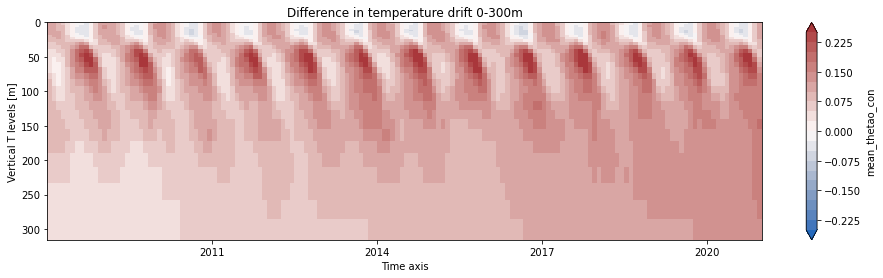

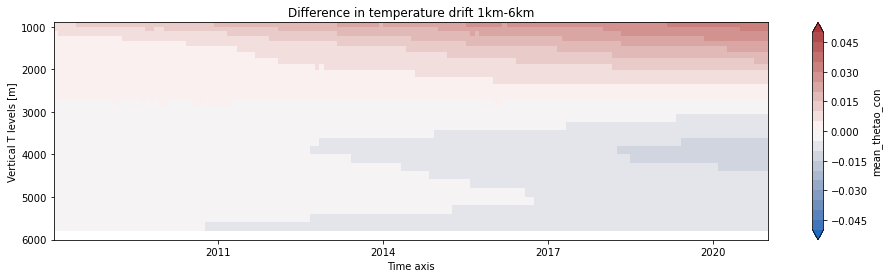

In [14]:
(TSanom[:,:35]).plot(aspect=4, size=4, x="time_counter", cmap="vlag", yincrease=False,
    vmin=-.25, vmax=.25, levels=21, extend='both');
plt.title("Difference in temperature drift 0-300m");

(TSanom[:,45:]).plot(aspect=4, size=4, x="time_counter", cmap="vlag", yincrease=False,
    vmin=-.05, vmax=.05, levels=21, extend='both');
plt.title("Difference in temperature drift 1km-6km");

### Correct rn_efr scaling and ice meltpond settings improves this, but bias still develops...

In [15]:
TS2anom = TS2['mean_thetao_con'][(12*0):(12*16)]-TS_A['mean_thetao_con'][GO8ys+12:GO8ys+204]
SS2anom = SS2['mean_so_abs'][(12*0):(12*16)]-SS_A['mean_so_abs'][GO8ys+12:GO8ys+204]

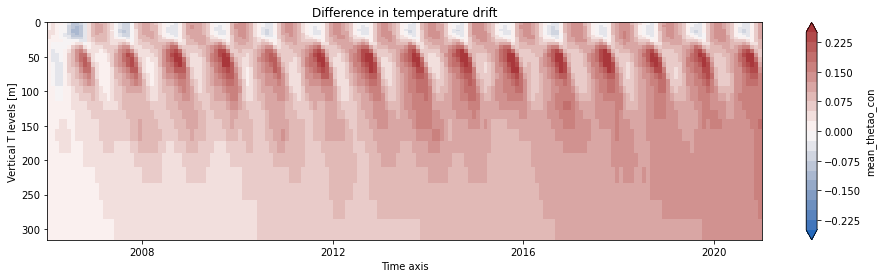

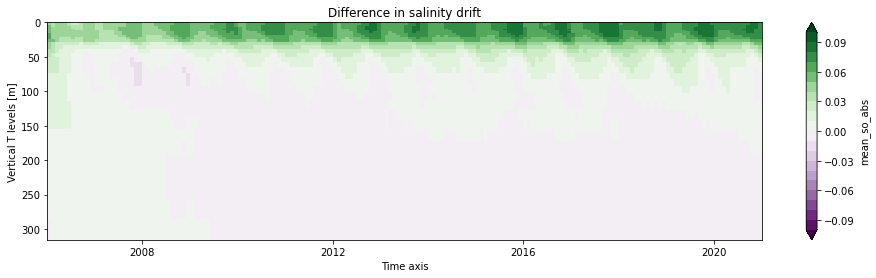

In [16]:
(TS2anom[:,:35]).plot(aspect=4, size=4, x="time_counter", cmap="vlag", yincrease=False,
    vmin=-.25, vmax=.25, levels=21, extend='both')
plt.title("Difference in temperature drift");

(SS2anom[:,:35]).plot(aspect=4, size=4, x="time_counter", cmap="PRGn", yincrease=False,
    vmin=-.1, vmax=.1, levels=21, extend='both')
plt.title("Difference in salinity drift");

##### Seems to be a global average salinification at the surface from the onset. Maybe an issue with the ICs created from the restart?...

### Drift below 1km extremely small (note the scale)...

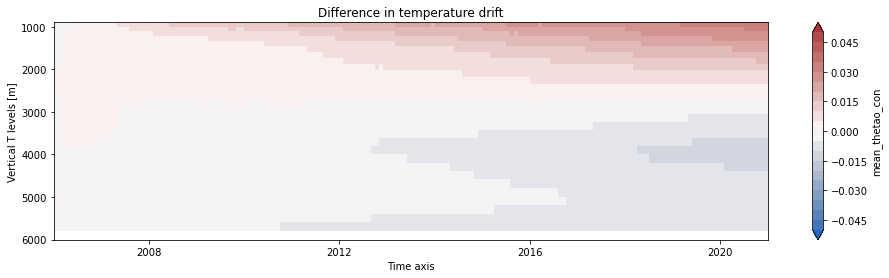

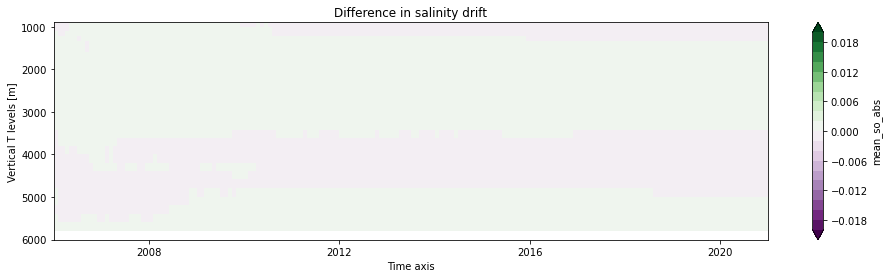

In [17]:
(TS2anom[:,45:]).plot(aspect=4, size=4, x="time_counter", cmap="vlag", yincrease=False,
    vmin=-.05, vmax=.05, levels=21, extend='both')
plt.title("Difference in temperature drift");

(SS2anom[:,45:]).plot(aspect=4, size=4, x="time_counter", cmap="PRGn", yincrease=False,
    vmin=-.02, vmax=.02, levels=21, extend='both')
plt.title("Difference in salinity drift");

# Surface/layer plots

## Load August 2007 data

In [18]:
NPD = "/gws/nopw/j04/noc_msm/atb299/NOC_NPD/eORCA12m/"
STS = xr.open_mfdataset(NPD+"2007/eORCA12_1m_grid_T_200708-200708.nc",preprocess=corr_cal, use_cftime=True)#, decode_times=False)

In [19]:
NPD2 = "/gws/nopw/j04/noc_msm/atb299/NOC_NPD/eORCA12/"
STS2 = xr.open_mfdataset(NPD2+"2007/eORCA12_1m_grid_T_200708-200708.nc",preprocess=corr_cal, use_cftime=True)#, decode_times=False)

In [20]:
NPDA = "/gws/nopw/j04/class_vol1/GO8p7/g8p7h/monthly/"
STS_A = xr.open_mfdataset(NPDA+"nemo_g8p7ho_1m_200707-200707_grid-T.nc",preprocess=corr_cal, use_cftime=True)#, decode_times=False)

## Temperature differences (NPDv1 - GO8p7h) for depth levels...

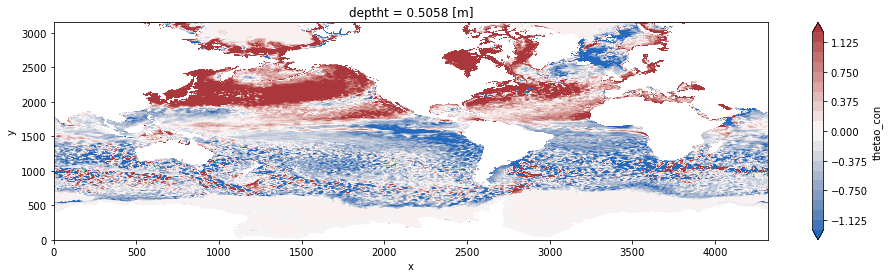

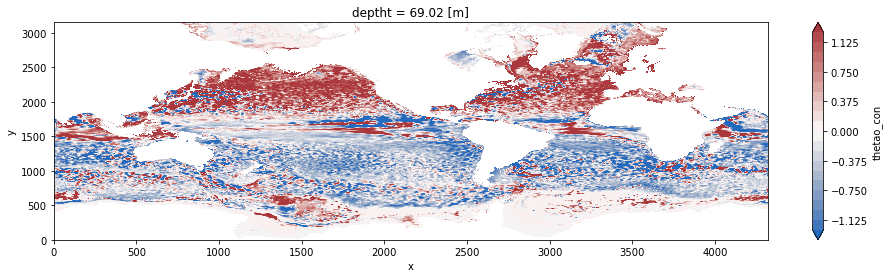

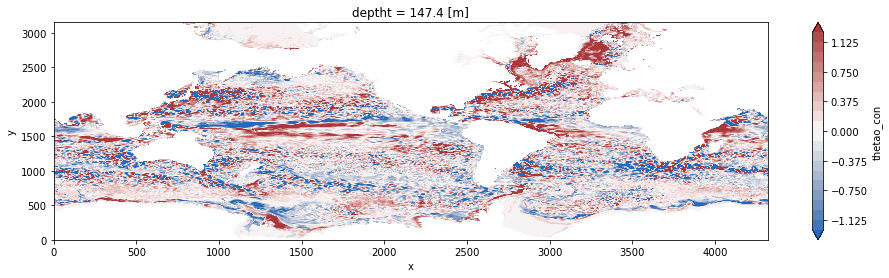

In [21]:
cr=1.25
(STS['thetao_con'][0,0,450:,:]-STS_A['thetao_con'][0,0,450:-1,1:-1]).plot(
    aspect=4, size=4, cmap="vlag",
    vmin=-cr, vmax=cr, levels=21, extend='both');
(STS['thetao_con'][0,20,450:,:]-STS_A['thetao_con'][0,20,450:-1,1:-1]).plot(
    aspect=4, size=4, cmap="vlag",
    vmin=-cr, vmax=cr, levels=21, extend='both');
(STS['thetao_con'][0,27,450:,:]-STS_A['thetao_con'][0,27,450:-1,1:-1]).plot(
    aspect=4, size=4, cmap="vlag",
    vmin=-cr, vmax=cr, levels=21, extend='both');

## Temperature differences (NPDv2 - GO8p7h) for depth levels...

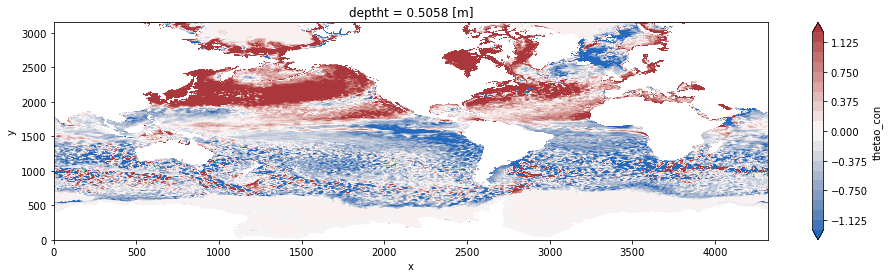

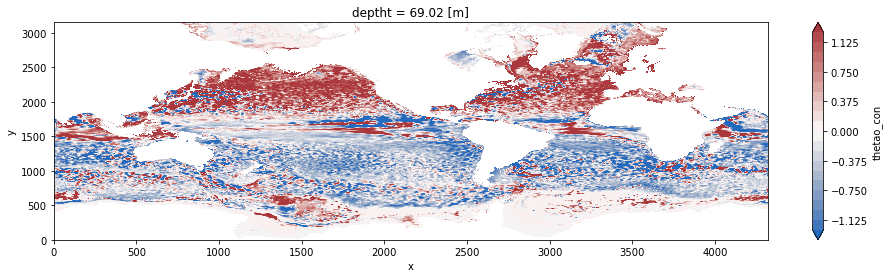

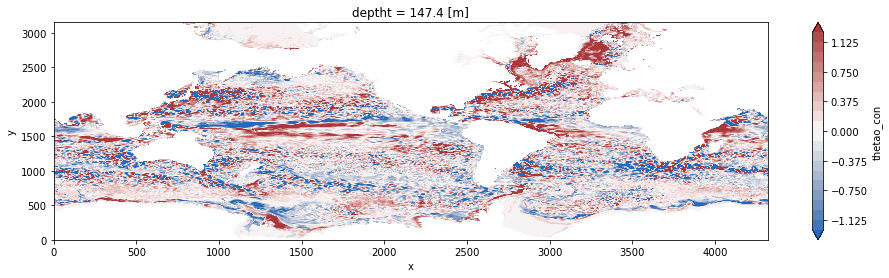

In [22]:
cr=1.25
(STS2['thetao_con'][0,0,450:,:]-STS_A['thetao_con'][0,0,450:-1,1:-1]).plot(
    aspect=4, size=4, cmap="vlag",
    vmin=-cr, vmax=cr, levels=21, extend='both');
(STS2['thetao_con'][0,20,450:,:]-STS_A['thetao_con'][0,20,450:-1,1:-1]).plot(
    aspect=4, size=4, cmap="vlag",
    vmin=-cr, vmax=cr, levels=21, extend='both');
(STS2['thetao_con'][0,27,450:,:]-STS_A['thetao_con'][0,27,450:-1,1:-1]).plot(
    aspect=4, size=4, cmap="vlag",
    vmin=-cr, vmax=cr, levels=21, extend='both');

## Temperature differences (NPDv2 - NPDv1) for depth levels...

##### Diff due to rn_efr scaling. General cooling below ML, and a corresponding SST warming in N. Pacific and (less so) N. Atlantic 

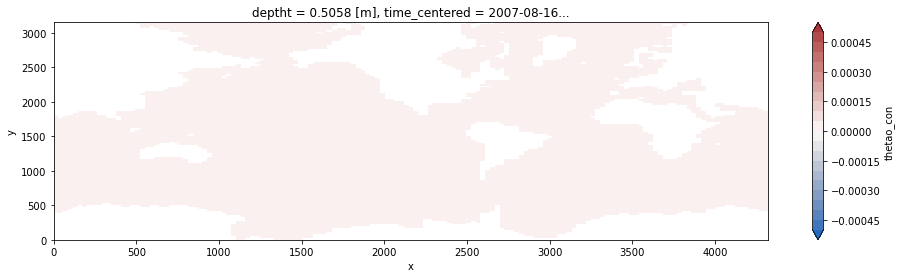

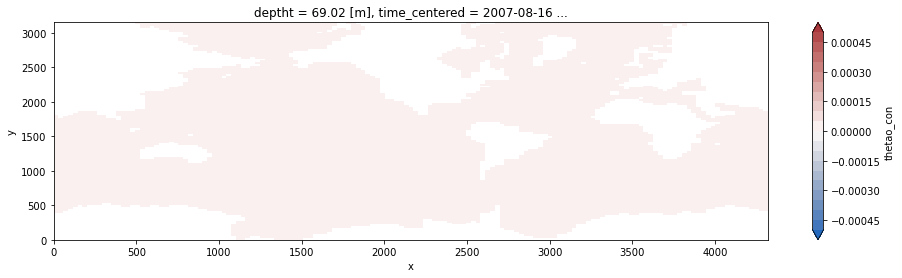

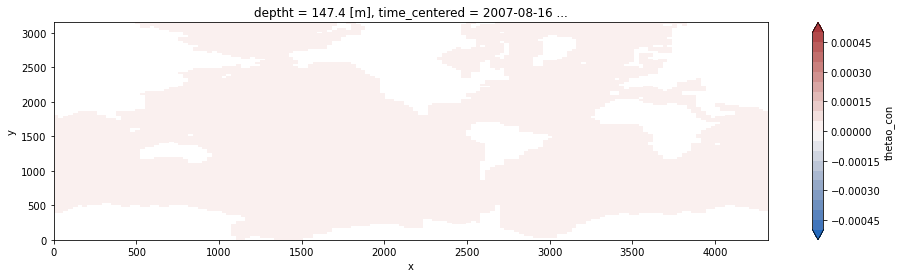

In [23]:
cr=.0005
(STS2['thetao_con'][0,0,450:,:]-STS['thetao_con'][0,0,450:,:]).plot(
    aspect=4, size=4, cmap="vlag",
    vmin=-cr, vmax=cr, levels=21, extend='both');
(STS2['thetao_con'][0,20,450:,:]-STS['thetao_con'][0,20,450:,:]).plot(
    aspect=4, size=4, cmap="vlag",
    vmin=-cr, vmax=cr, levels=21, extend='both');
(STS2['thetao_con'][0,27,450:,:]-STS['thetao_con'][0,27,450:,:]).plot(
    aspect=4, size=4, cmap="vlag",
    vmin=-cr, vmax=cr, levels=21, extend='both');

### Surface is fresher in the Arctic in NPDv2 (and NPDv1, not shown)...

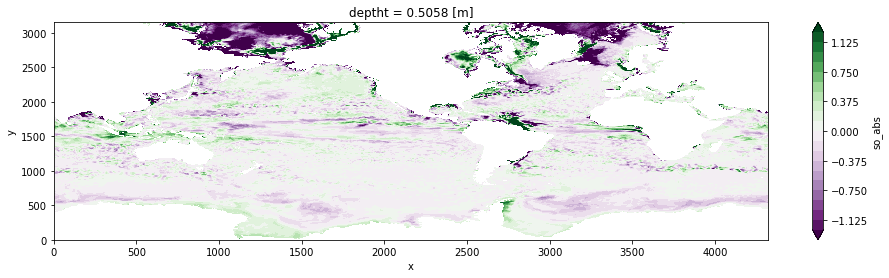

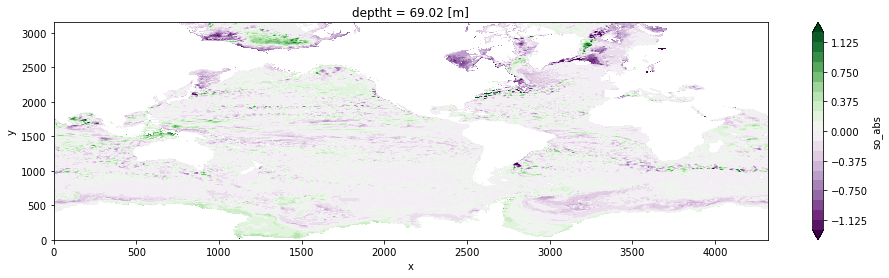

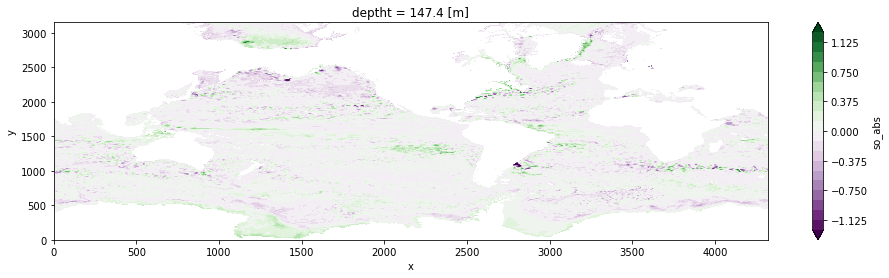

In [24]:
cr=1.25
(STS2['so_abs'][0,0,450:,:]-STS_A['so_abs'][0,0,450:-1,1:-1]).plot(
    aspect=4, size=4, cmap="PRGn",
    vmin=-cr, vmax=cr, levels=21, extend='both');
(STS2['so_abs'][0,20,450:,:]-STS_A['so_abs'][0,20,450:-1,1:-1]).plot(
    aspect=4, size=4, cmap="PRGn",
    vmin=-cr, vmax=cr, levels=21, extend='both');
(STS2['so_abs'][0,27,450:,:]-STS_A['so_abs'][0,27,450:-1,1:-1]).plot(
    aspect=4, size=4, cmap="PRGn",
    vmin=-cr, vmax=cr, levels=21, extend='both');

## More Antarctic sea ice in NPD during winter, a little less Arctic ice during summer...

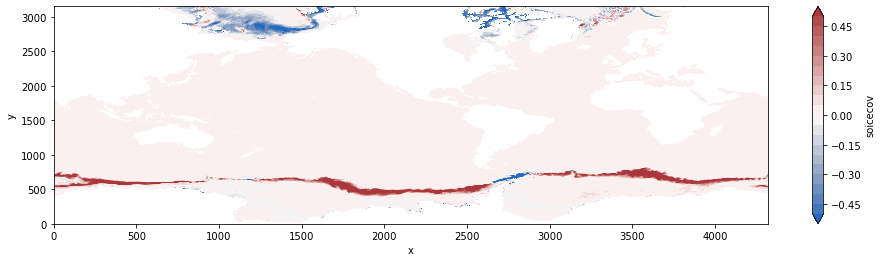

In [25]:
(STS2['soicecov'][0,450:,:]-STS_A['soicecov'][0,450:-1,1:-1]).plot(
    aspect=4, size=4, cmap="vlag",
    vmin=-.5, vmax=.5, levels=21, extend='both');

## AMOC plots

### Load and pre-process data

In [26]:
def moc_proc(ds):  
    # Coordinate variables are not assigned
    ds = ds.squeeze()
    ds['nav_lat'] = ds['nav_lat'].sel(time_counter=ds['time_counter'][0]).drop('time_counter')
    ds['nav_lon'] = ds['nav_lon'].sel(time_counter=ds['time_counter'][0]).drop('time_counter')
    ds['depthv'] = (ds['depthv']*-1).sel(time_counter=ds['time_counter'][0]).drop('time_counter')

    # CDFtool has used 0. as missing value for latitude, so replace with nan...
    ds['nav_lat'][:500] = ds['nav_lat'][:500].where(ds['nav_lat'][:500] != 0.,np.nan)
    ds['nav_lat'][-800:] = ds['nav_lat'][-800:].where(ds['nav_lat'][-800:] != 0.,np.nan)

    ds=ds.assign_coords({"y": ds['nav_lat']})
    ds=ds.assign_coords({"depthw": ds['depthv']})
    
    return ds

In [27]:
# Conservative temperature
Mf  = !ls /gws/nopw/j04/noc_msm/atb299/NOC_NPD/Analysis/output_v1/*moc.nc
Mf2 = !ls /gws/nopw/j04/noc_msm/atb299/NOC_NPD/Analysis/output/*moc.nc
MfA = !ls /gws/nopw/j04/noc_msm/atb299/NOC_NPD/Analysis_GO8p7h/output/*moc.nc

In [28]:
MOCA = xr.open_mfdataset(MfA[12:],preprocess=corr_cal,use_cftime=True)

In [29]:
# NPD (issue with non-leap and leap year calendars to resolve... )
MOC  = moc_proc(xr.open_mfdataset(Mf[12:],preprocess=corr_cal,use_cftime=True))
MOC2 = moc_proc(xr.open_mfdataset(Mf2,preprocess=corr_cal,use_cftime=True))
MOCA = moc_proc(xr.open_mfdataset(MfA[12:],preprocess=corr_cal,use_cftime=True))

### Compute mean, std, etc...

In [30]:
def amoc_proc(moc):
    # Something not quite right with latitudes, so constrain values to 1590:2992 for now...
    ds = moc['zomsfatl'][:,:,1590:2992].to_dataset(name="AMOC")
    ds = ds.where(ds != 0.,np.nan)
    ds['AMOC_mean'] = ds['AMOC'].mean('time_counter', skipna=True)
    ds['AMOC_std'] = ds['AMOC'].std('time_counter', skipna=True)
    ds['AMOC26'] = ds['AMOC'].sel(y = 26, method="nearest")
    ds['AMOC26_1k'] = ds['AMOC26'].sel(depthw = (1000), method="nearest")
    ds['AMOC26_1k_sc'] = ds['AMOC26_1k'].groupby('time_counter.month').mean("time_counter")
    #ds['AMOC26_1k_ym'] = reshym(AMOC26_1k)
    return ds

In [31]:
AMOC = amoc_proc(MOC)
AMOC2 = amoc_proc(MOC2)
AMOCA = amoc_proc(MOCA)

### Plot AMOC

In [32]:
def amoc_plot(amoc):
    amoc['AMOC_mean'].plot( extend='both', levels=20, aspect=4, size=4, yincrease=False); plt.title("AMOC mean");
    amoc['AMOC_std'].plot( extend='both', levels=20, aspect=4, size=4, yincrease=False); plt.title("AMOC standard deviation");
    amoc['AMOC26'].plot(x='time_counter', extend='both', levels=20, aspect=4, size=4, yincrease=False); plt.title("AMOC @26N");
    amoc['AMOC26_1k'].plot(x='time_counter', aspect=4, size=4); plt.title("AMOC @26N, 1km depth");
    amoc['AMOC26_1k_sc'].plot(aspect=4, size=4); plt.title("Mean seasonal cycle of AMOC @26N, 1km depth");

### AMOC: Alex's GO8p7h 

/home/users/atb299/miniconda3/envs/Sci/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


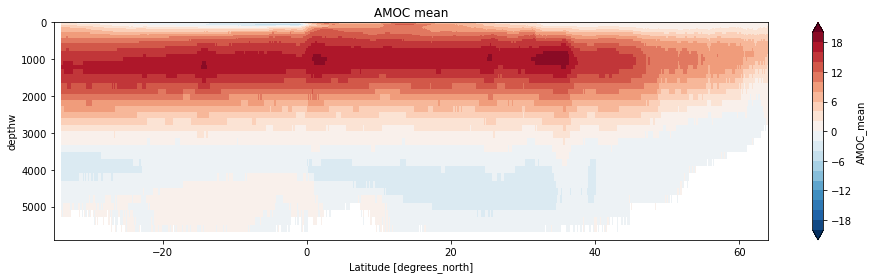

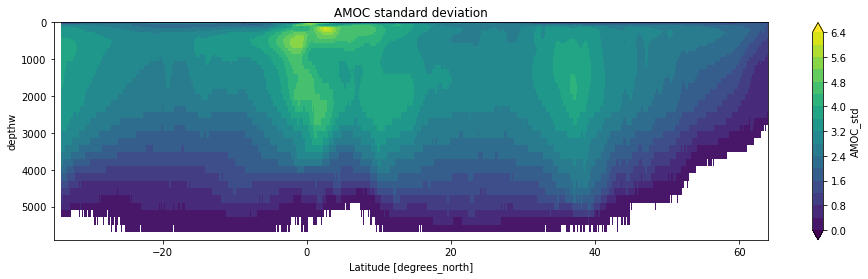

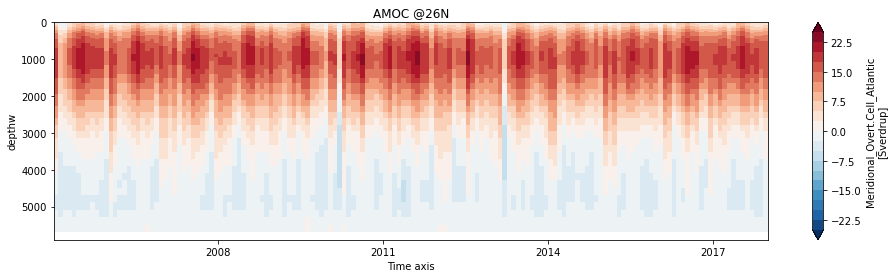

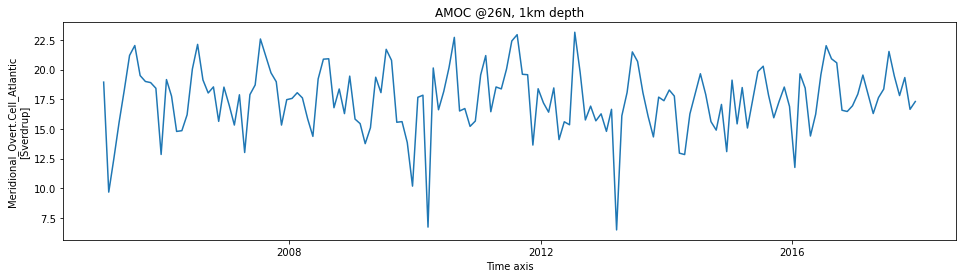

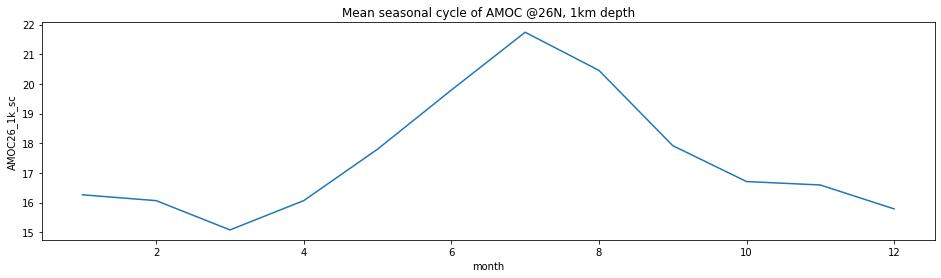

In [33]:
amoc_plot(AMOCA.sel(time_counter=slice('2005-01-01', '2018-01-01')))

### AMOC: NPD v2

#### I need to check the mesh_mask file - there looks to be a suspiciously straight line at ~4700m in the 26N time-depth plot

#### AMOC has also reduced to ~14 Sv compared with ~17 Sv in GO8p7

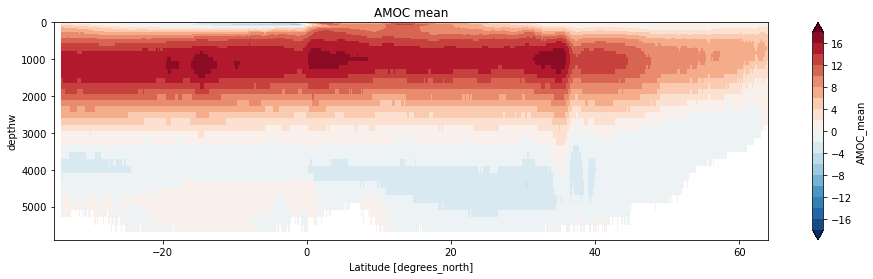

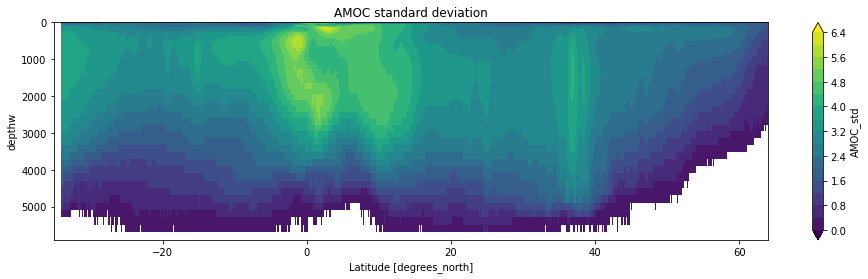

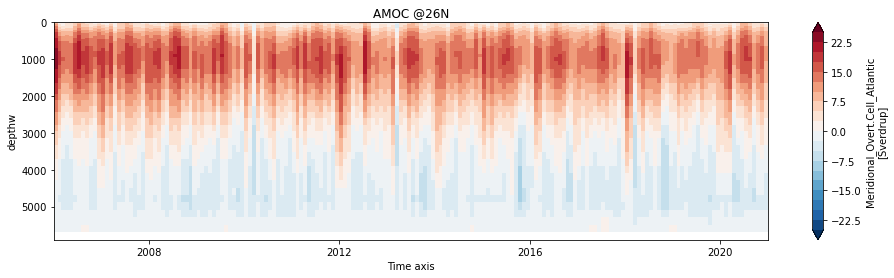

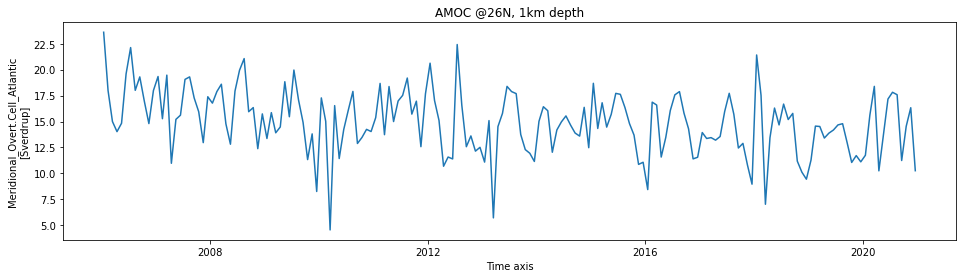

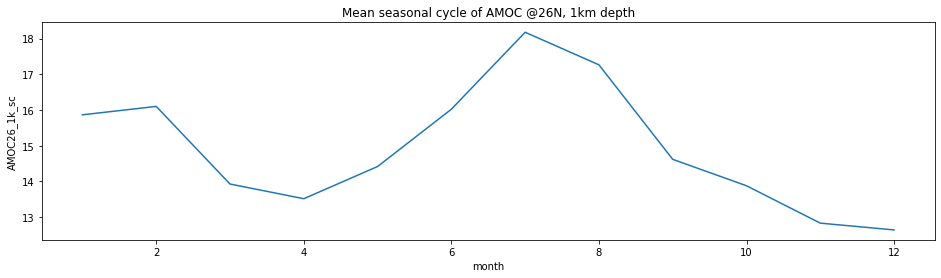

In [34]:
amoc_plot(AMOC2)

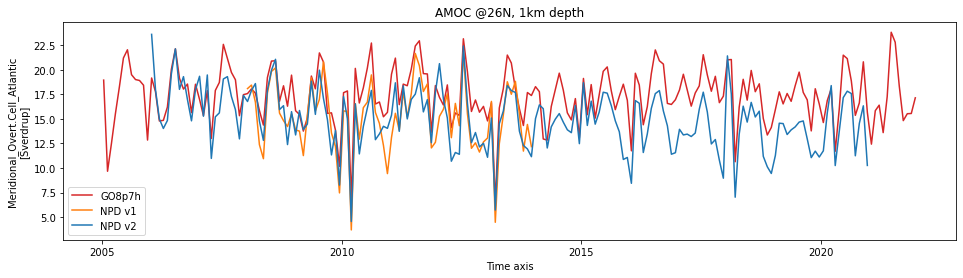

In [35]:
AMOCA['AMOC26_1k'][GO8ys:].plot(x='time_counter', aspect=4, size=4, color='C3',label="GO8p7h"); 
AMOC['AMOC26_1k'].plot(color='C1',label="NPD v1");
AMOC2['AMOC26_1k'].plot(color='C0',label="NPD v2");
plt.legend()
plt.title("AMOC @26N, 1km depth");